# 04 - Sensitivity Analysis

Uncertainty quantification and parameter sensitivity study.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from src.validation.uncertainty import UncertaintyQuantification

## Monte Carlo Analysis

In [2]:
uq = UncertaintyQuantification(n_samples=500)

# Run Monte Carlo
m, p, t = 0.02, 0.4, 0.12
results = uq.monte_carlo(m, p, t)

print("Monte Carlo Results:")
print(f"  L/D: {results['ld']['mean']:.1f} ± {results['ld']['std']:.1f}")
print(f"  95% CI: [{results['ld']['ci_95'][0]:.1f}, {results['ld']['ci_95'][1]:.1f}]")
print(f"  Cl: {results['cl']['mean']:.3f} ± {results['cl']['std']:.3f}")
print(f"  Cd: {results['cd']['mean']:.5f} ± {results['cd']['std']:.5f}")

Monte Carlo Results:
  L/D: 18.0 ± 0.0
  95% CI: [18.0, 18.0]
  Cl: 0.785 ± 0.003
  Cd: 0.04351 ± 0.00022


## Sensitivity Analysis

In [3]:
sens = uq.sensitivity_analysis(m, p, t)

print("\nSensitivity Analysis:")
print(f"  Parameter importance ranking: {', '.join(sens['ranking'])}")
print(f"\n  Camber (m):")
print(f"    dCl/dm = {sens['m']['dcl_dm']:.2f}")
print(f"    dCd/dm = {sens['m']['dcd_dm']:.4f}")
print(f"\n  Position (p):")
print(f"    dCl/dp = {sens['p']['dcl_dp']:.2f}")
print(f"\n  Thickness (t):")
print(f"    dCl/dt = {sens['t']['dcl_dt']:.2f}")
print(f"    dCd/dt = {sens['t']['dcd_dt']:.4f}")


Sensitivity Analysis:
  Parameter importance ranking: t, m, p

  Camber (m):
    dCl/dm = 13.78
    dCd/dm = 1.1612

  Position (p):
    dCl/dp = 0.00

  Thickness (t):
    dCl/dt = 0.53
    dCd/dt = 0.0674


## Robust Optimization Bounds

In [4]:
robust = uq.robust_optimization_bounds(m, p, t, confidence=0.95)

print("\nRobust Optimization:")
print(f"  Nominal L/D: {robust['nominal_ld']:.1f}")
print(f"  Robust L/D (95%): {robust['robust_ld']:.1f}")
print(f"  Design margin: {robust['margin_pct']:.1f}%")
print(f"  Recommendation: {robust['recommendation']}")


Robust Optimization:
  Nominal L/D: 18.0
  Robust L/D (95%): 18.0
  Design margin: 0.0%
  Recommendation: Low uncertainty. Design is robust.


## Visualization

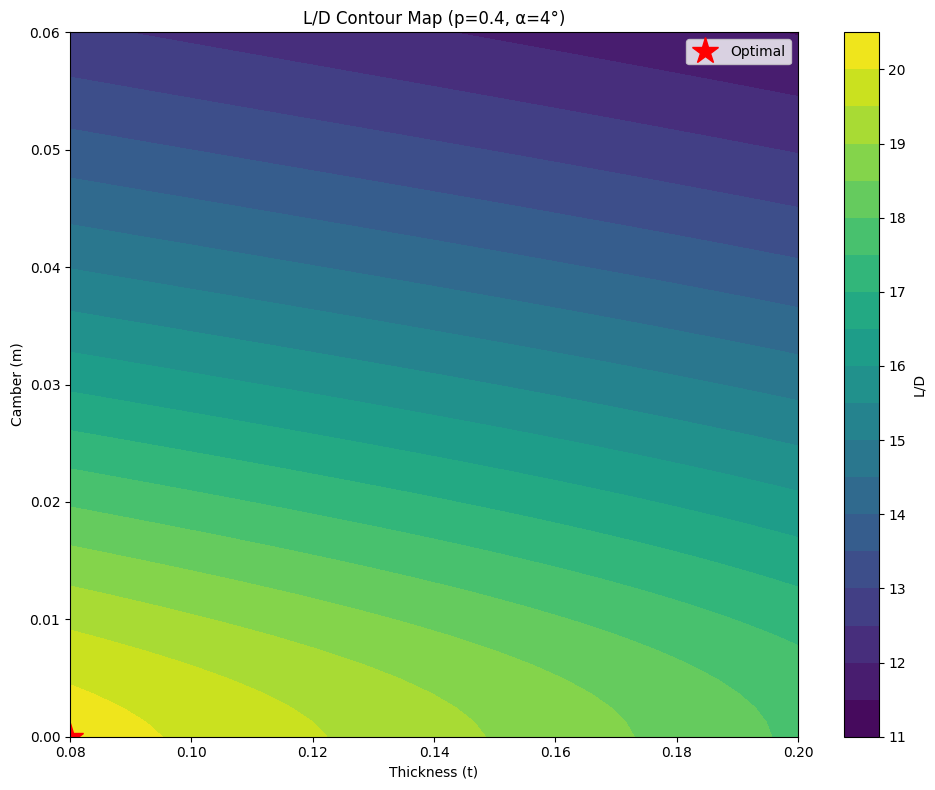

Optimal design: m=0.0000, t=0.0800
Max L/D: 20.3


In [5]:
# Parameter sweep
from aero_eval import aero_score

m_range = np.linspace(0.0, 0.06, 50)
t_range = np.linspace(0.08, 0.20, 50)

ld_matrix = np.zeros((len(m_range), len(t_range)))

for i, m_val in enumerate(m_range):
    for j, t_val in enumerate(t_range):
        cl, cd = aero_score(m_val, 0.4, t_val)
        ld_matrix[i, j] = cl / cd if cd > 0 else 0

fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(t_range, m_range, ld_matrix, levels=20, cmap='viridis')
ax.set_xlabel('Thickness (t)')
ax.set_ylabel('Camber (m)')
ax.set_title('L/D Contour Map (p=0.4, α=4°)')
plt.colorbar(contour, label='L/D')

# Mark optimal point
opt_idx = np.unravel_index(np.argmax(ld_matrix), ld_matrix.shape)
ax.plot(t_range[opt_idx[1]], m_range[opt_idx[0]], 'r*', markersize=20, label='Optimal')
ax.legend()

plt.tight_layout()
plt.savefig('../results/figures/sensitivity_contour.png', dpi=300)
plt.show()

print(f"Optimal design: m={m_range[opt_idx[0]]:.4f}, t={t_range[opt_idx[1]]:.4f}")
print(f"Max L/D: {ld_matrix.max():.1f}")